# NAME - Kartikay Agrawal
# REG NO. - 2148064

In [33]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [34]:
friends = pd.read_csv("/content/sample_data/friends_dataset.csv - friends_dataset.csv.csv")

In [35]:
friends.head(5)

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438


In [36]:
friends.tail(5)

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes
231,2004,10,14,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,8.6,2989
232,2004,10,15,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,8.5,2771
233,2004,10,16,The One with Rachel's Going Away Party,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,8.9,3141
234,2004,10,17,The Last One: Part 1,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,9.5,6221
235,2004,10,18,The Last One: Part 2,30,Phoebe races Ross to the airport in a bid to s...,Kevin Bright,9.7,10381


In [37]:
friends.loc[233,'Episode_Title'] = "The Last One I"
friends.loc[234,"Episode_Title"] = "The Last One II"

In [38]:
friends.tail()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes
231,2004,10,14,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,8.6,2989
232,2004,10,15,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,8.5,2771
233,2004,10,16,The Last One I,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,8.9,3141
234,2004,10,17,The Last One II,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,9.5,6221
235,2004,10,18,The Last One: Part 2,30,Phoebe races Ross to the airport in a bid to s...,Kevin Bright,9.7,10381


In [39]:
friends.duplicated().sum()

0

In [40]:
friends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year_of_prod    236 non-null    int64  
 1   Season          236 non-null    int64  
 2   Episode Number  236 non-null    int64  
 3   Episode_Title   236 non-null    object 
 4   Duration        236 non-null    int64  
 5   Summary         236 non-null    object 
 6   Director        236 non-null    object 
 7   Stars           236 non-null    float64
 8   Votes           236 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 16.7+ KB


In [41]:
friends['Season'] = friends['Season'].astype("object")

In [42]:
friends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year_of_prod    236 non-null    int64  
 1   Season          236 non-null    object 
 2   Episode Number  236 non-null    int64  
 3   Episode_Title   236 non-null    object 
 4   Duration        236 non-null    int64  
 5   Summary         236 non-null    object 
 6   Director        236 non-null    object 
 7   Stars           236 non-null    float64
 8   Votes           236 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 16.7+ KB


In [43]:
friends.shape

(236, 9)

In [44]:
print("The show started in {} and ended in {}".format(min(friends['Year_of_prod']),max(friends['Year_of_prod'])))

The show started in 1994 and ended in 2004


In [45]:
friends['Season'].value_counts().sort_index()

1     24
2     24
3     25
4     24
5     24
6     25
7     24
8     24
9     24
10    18
Name: Season, dtype: int64

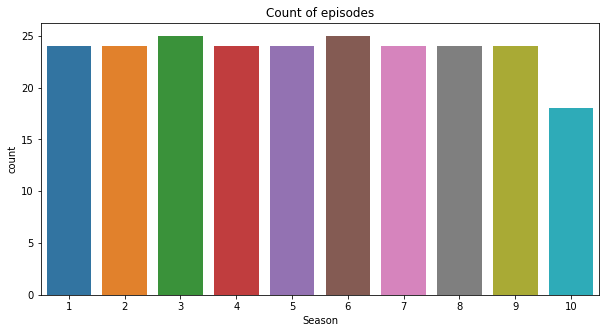

In [46]:
plt.figure(figsize=(10,5))
plt.xlabel("Season")
plt.title("Count of episodes")
sns.countplot(x = "Season", data = friends)

In [47]:
season_duration = friends.groupby('Season').Duration.sum().to_frame().reset_index()
season_duration

,Season,Duration
0,1,528
1,2,528
2,3,550
3,4,544
4,5,528
5,6,582
6,7,528
7,8,528
8,9,544
9,10,412


(300.0, 600.0)

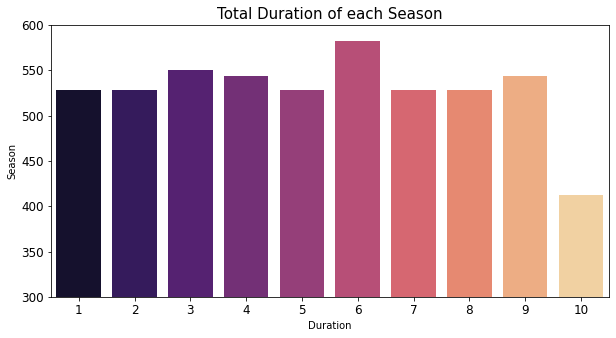

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(x=season_duration.Season, y=season_duration.Duration, palette='magma')
plt.title('Total Duration of each Season', fontsize=15)
plt.xlabel('Duration')
plt.ylabel('Season')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(300, 600)

In [49]:
season_stars = friends.groupby('Season').mean().Stars.to_frame().reset_index()
season_stars.columns = ['Season','Average Stars']
season_stars = season_stars.sort_values('Average Stars', ascending=False)
season_stars

,Season,Average Stars
9,10,8.677778
4,5,8.637500
5,6,8.496000
3,4,8.475000
1,2,8.458333
7,8,8.445833
6,7,8.437500
2,3,8.408000
0,1,8.316667
8,9,8.291667


(8.0, 9.0)

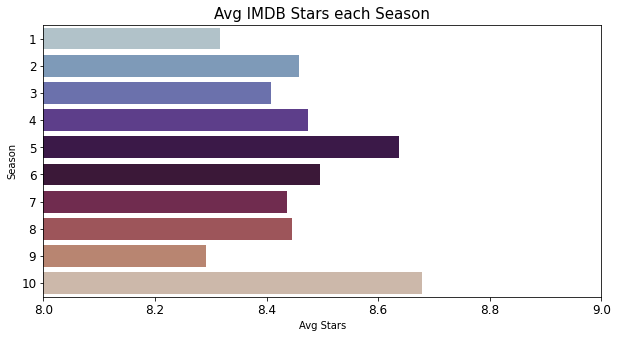

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(y=season_stars.Season, x=season_stars['Average Stars'], palette='twilight', orient='h')
plt.title('Avg IMDB Stars each Season', fontsize=15)
plt.xlabel('Avg Stars')
plt.ylabel('Season')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(8, 9)

In [51]:
season_pop_epi = friends[['Episode_Title', 'Stars']].sort_values('Stars', ascending=False).head(10).reset_index(drop=True)
season_pop_epi

,Episode_Title,Stars
0,The Last One: Part 2,9.7
1,The One Where Everybody Finds Out,9.7
2,The Last One II,9.5
3,The One with the Embryos,9.5
4,The One with the Prom Video,9.4
5,The One with the Rumor,9.3
6,The One with the Proposal,9.3
7,The One with the Videotape,9.3
8,The One with Ross's Wedding,9.2
9,The One with Monica and Chandler's Wedding: Pa...,9.2


(9.0, 10.0)

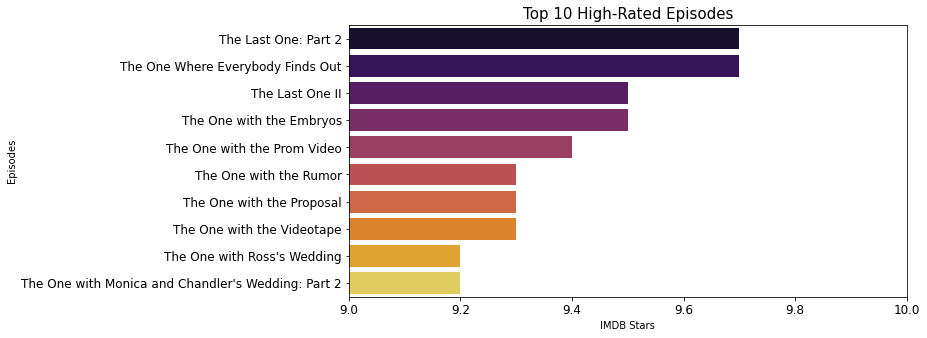

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(y=season_pop_epi.Episode_Title, x=season_pop_epi.Stars, palette='inferno', orient='h')
plt.title('Top 10 High-Rated Episodes', fontsize=15)
plt.xlabel('IMDB Stars')
plt.ylabel('Episodes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(9, 10)

In [53]:
season_pop_epi = friends[['Episode_Title', 'Stars']].sort_values('Stars', ascending=False).tail(10).reset_index(drop=True)
season_pop_epi

,Episode_Title,Stars
0,The One with the Evil Orthodontist,7.9
1,The One with the Fake Monica,7.9
2,The One with the Stain,7.9
3,The One Where They're Going to Party!,7.9
4,The One with the Donor,7.8
5,The One with Joey's Interview,7.5
6,The One with Christmas in Tulsa,7.5
7,The One with the Vows,7.5
8,The One with Mac and C.H.E.E.S.E.,7.4
9,The One with the Invitation,7.2


(7.0, 8.0)

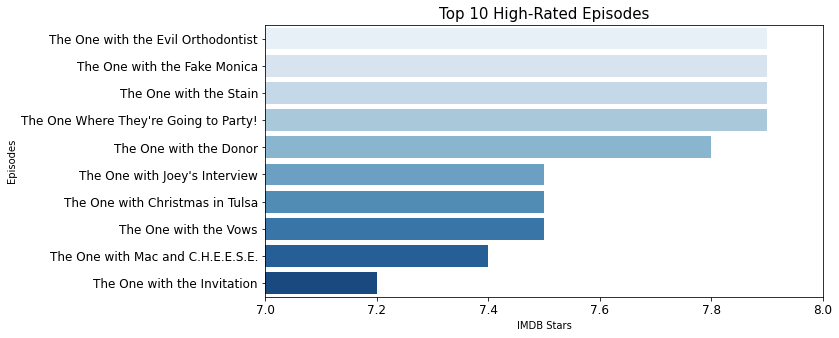

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(y=season_pop_epi.Episode_Title, x=season_pop_epi.Stars, palette='Blues', orient='h')
plt.title('Top 10 High-Rated Episodes', fontsize=15)
plt.xlabel('IMDB Stars')
plt.ylabel('Episodes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(7, 8)

In [55]:
director_count = friends.groupby("Director").Episode_Title.count().sort_values(ascending=False)
director_count

Director
Gary Halvorson          54
Kevin Bright            54
Michael Lembeck         24
James Burrows           15
Gail Mancuso            14
Peter Bonerz            12
Ben Weiss               10
David Schwimmer         10
Robby Benson             6
Shelley Jensen           6
Terry Hughes             5
Sheldon Epps             3
Dana De Vally Piazza     3
Roger Christiansen       2
Pamela Fryman            2
Thomas Schlamme          2
Steve Zuckerman          2
Alan Myerson             2
David Steinberg          1
Arlene Sanford           1
Andrew Tsao              1
Todd Holland             1
Ellen Gittelsohn         1
Joe Regalbuto            1
Paul Lazarus             1
Sam Simon                1
Stephen Prime            1
Mary Kay Place           1
Name: Episode_Title, dtype: int64

In [56]:
director_count.count()

28

In [57]:
top10_dir = director_count.head(10).reset_index()
top10_dir

,Director,Episode_Title
0,Gary Halvorson,54
1,Kevin Bright,54
2,Michael Lembeck,24
3,James Burrows,15
4,Gail Mancuso,14
5,Peter Bonerz,12
6,Ben Weiss,10
7,David Schwimmer,10
8,Robby Benson,6
9,Shelley Jensen,6


Text(0, 0.5, 'No Of Episodes')

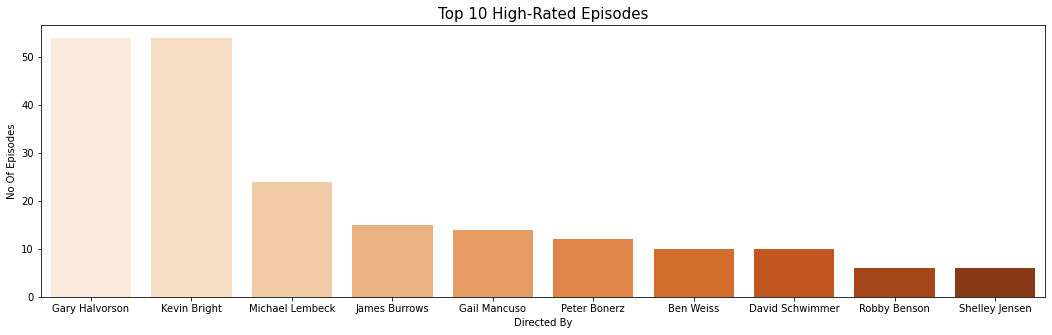

In [58]:
plt.figure(figsize=(18,5))
sns.barplot(x=top10_dir['Director'], y=top10_dir['Episode_Title'], palette='Oranges')
plt.title('Top 10 High-Rated Episodes', fontsize=15)
plt.xlabel('Directed By')
plt.ylabel('No Of Episodes')

In [59]:
director_1 = director_count.reset_index()
director_1.columns= ["Director","Episode Count"]

director_1 = director_1[director_1['Episode Count'] == 1]
director_1

,Director,Episode Count
18,David Steinberg,1
19,Arlene Sanford,1
20,Andrew Tsao,1
21,Todd Holland,1
22,Ellen Gittelsohn,1
23,Joe Regalbuto,1
24,Paul Lazarus,1
25,Sam Simon,1
26,Stephen Prime,1
27,Mary Kay Place,1


In [61]:
df = pd.read_csv('/content/sample_data/friends_dataset.csv')
df

,Unnamed: 0,Location,Scene,Season,Speaker,Text
0,0,Chandler and Joey's,Joey is repacking the furniture into boxes to...,4,Joey,What?
1,1,Monica and Rachel's,"the next morning, Monica is getting the door,",1,Monica,"Oh, you got the whole night, huh?"
2,2,Mike's apartment,His phone rings and he picks up,9,Chandler,"Phoebe is going to say ""yes""? That's, that's g..."
3,3,Monica and Rachel's,Ross and Monica are sitting on the couch play...,4,Ross,Yeah.
4,4,Phoebe’s birthday,she’s telling everyone what she found out at ...,7,Phoebe,Oh!
...,...,...,...,...,...,...
93330,93330,Camera fades to one of the band members playin...,"The chapel is full of guest, A groomsmen esco...",4,Chandler,What we did last night was....
93331,93331,Monica and Chandler's apartment,Chandler is watching TV and Monica is cooking,10,Chandler,I'm telling ya! It's gonna happen. Next year i...
93332,93332,Monica and Rachel's,"everyone is sitting around the kitchen table,...",1,Ross,Yeah.
93333,93333,Chandler and Joey's,Joey is repacking the furniture into boxes to...,4,Ross,What are you doing?


In [66]:
df.drop('Unnamed: 0',1,inplace = True)
df

,Location,Scene,Season,Speaker,Text
0,Chandler and Joey's,Joey is repacking the furniture into boxes to...,4,Joey,What?
1,Monica and Rachel's,"the next morning, Monica is getting the door,",1,Monica,"Oh, you got the whole night, huh?"
2,Mike's apartment,His phone rings and he picks up,9,Chandler,"Phoebe is going to say ""yes""? That's, that's g..."
3,Monica and Rachel's,Ross and Monica are sitting on the couch play...,4,Ross,Yeah.
4,Phoebe’s birthday,she’s telling everyone what she found out at ...,7,Phoebe,Oh!
...,...,...,...,...,...
93330,Camera fades to one of the band members playin...,"The chapel is full of guest, A groomsmen esco...",4,Chandler,What we did last night was....
93331,Monica and Chandler's apartment,Chandler is watching TV and Monica is cooking,10,Chandler,I'm telling ya! It's gonna happen. Next year i...
93332,Monica and Rachel's,"everyone is sitting around the kitchen table,...",1,Ross,Yeah.
93333,Chandler and Joey's,Joey is repacking the furniture into boxes to...,4,Ross,What are you doing?


In [67]:
df = df.replace(np.nan, '', regex=True)

In [68]:
joey_df = df.loc[df['Speaker'] == 'Joey'] 

In [69]:
joey_text = joey_df['Text'].to_list()

In [71]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [73]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [74]:
import string
joey_text_lowered = [text.lower() for text in joey_text]
# print(joey_text)


from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
joey_text_tokenized = [tokenizer.tokenize(text) for text in joey_text_lowered]


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# print(stopwords.words('english'))


stop_words = set(stopwords.words('english'))
filtered_joey_text = []

for text in joey_text_tokenized:
    for word in text:
        if word not in stop_words:
            filtered_joey_text.append(word)

# print(filtered_joey_text)


from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stemmed_joey_text = []
for word in filtered_joey_text:
    stemmed_text = []
#     stemmed_joey_text.append(stemmer.stem(word))
    stemmed_text.append(lemmatizer.lemmatize(word))
    stemmed_joey_text.append(stemmed_text)
print(stemmed_joey_text)

[['uh'], ['listen'], ['gotta'], ['double'], ['check'], ['ticket'], ['tonight'], ['got'], ['right'], ['right'], ['maybe'], ['maybe'], ['ask'], ['leave'], ['conversation'], ['never'], ['happened'], ['yeah'], ['number'], ['sidney'], ['mark'], ['please'], ['fertility'], ['study'], ['well'], ['used'], ['woman'], ['forward'], ['uh'], ['good'], ['check'], ['say'], ['okay'], ['great'], ['thanks'], ['bye'], ['bye'], ['look'], ['told'], ['ya'], ['going'], ['clinic'], ['problem'], ['one'], ['problem'], ['go'], ['quit'], ['baby'], ['leave'], ['alone'], ['clinic'], ['morning'], ['ready'], ['go'], ['gotta'], ['tell'], ['ross'], ['feel'], ['hey'], ['mon'], ['might'], ['wanna'], ['make'], ['lasagna'], ['something'], ['might'], ['happened'], ['huge'], ['chunk'], ['damnit'], ['anybody'], ['got'], ['anything'], ['whipped'], ['whipped'], ['wh'], ['tcssh'], ['cooked'], ['sorry'], ['monica'], ['chandler'], ['making'], ['love'], ['imagine'], ['protective'], ['porn'], ['bubble'], ['okay'], ['right'], ['look']

In [76]:
#text

import string

def textLowered(original_text):
    text_lowered = [text.lower() for text in original_text]
    return text_lowered
# print(joey_text)


from nltk.tokenize import RegexpTokenizer

def textTokenized(text_lowered):
    tokenizer = RegexpTokenizer(r'\w+')
    text_tokenized = [tokenizer.tokenize(text) for text in text_lowered]
    return text_tokenized

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# print(stopwords.words('english'))


def textFiltered(text_tokenized):
    stop_words = set(stopwords.words('english'))
    filtered_text = []
    for text in text_tokenized:
        for word in text:
            if word not in stop_words:
                filtered_text.append(word)
    return filtered_text

# print(filtered_joey_text)

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


def textStemmed(filtered_text):
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stemmed_joey_text = []
    for word in filtered_joey_text:
        stemmed_text = []
#     stemmed_joey_text.append(stemmer.stem(word))
        stemmed_text.append(lemmatizer.lemmatize(word))
        stemmed_joey_text.append(stemmed_text)
    return stemmed_joey_text

In [77]:
#joey
joey_text_lowered = textLowered(joey_text)
joey_text_tokenized = textTokenized(joey_text_lowered)
joey_filtered_text = textFiltered(joey_text_tokenized)
joey_stemmed_text = textStemmed(joey_filtered_text)

In [78]:
import csv 
  
file = open('joey.csv', 'w+', newline ='') 
  
# writing the data into the file 
with file:     
    write = csv.writer(file) 
    write.writerows(joey_stemmed_text) 
    
    
joey = pd.read_csv('./joey.csv')
# joey.drop(['i','m','e'],1, inplace = True)
joey = joey.to_csv(index=False)

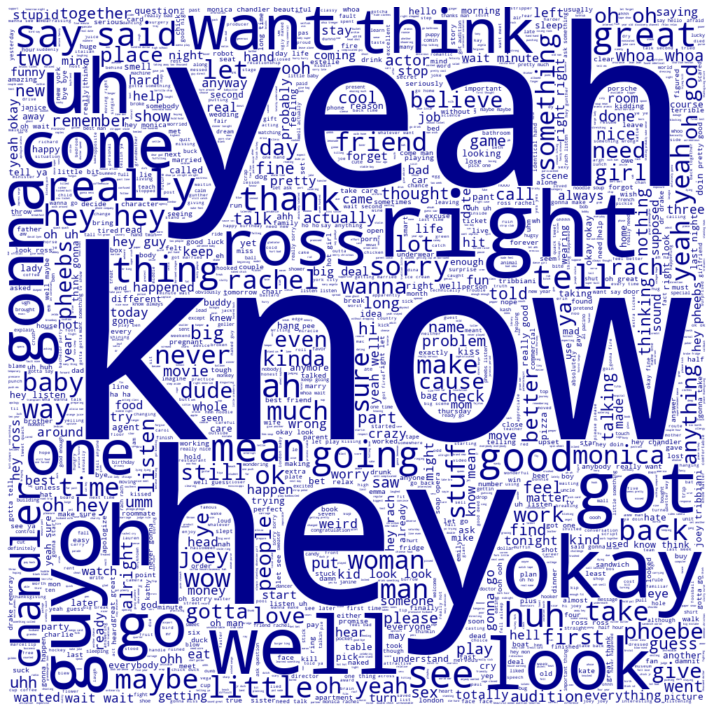

<Figure size 432x288 with 0 Axes>

In [79]:
import cv2
from wordcloud import WordCloud 
import matplotlib.pyplot as plt#White text Black Background
image = cv2.imread('../input/joey-new/Joey-removebg-preview.png', 0)
wordcloud = WordCloud(background_color='white', mask=image, mode="RGB", color_func=lambda *args, **kwargs: "darkblue", 
width=1000 , max_words=70000, height=1000, random_state=1).generate(joey)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()
plt.savefig('joey.png', bbox_inches='tight');

In [81]:
from PIL import Image
from numpy import asarray
  
  
# load the image and convert into 
# numpy array
img = Image.open('/content/sample_data/Forever_Friends.jpg')
numpydata = asarray(img)
  
# data
print(numpydata)


[[[218 213 217]
  [218 213 217]
  [220 215 219]
  ...
  [103  70  51]
  [109  76  57]
  [115  82  63]]

 [[211 207 208]
  [210 206 207]
  [211 206 210]
  ...
  [118  83  63]
  [122  87  67]
  [126  91  71]]

 [[209 205 206]
  [207 203 204]
  [207 203 204]
  ...
  [133  97  75]
  [134  98  76]
  [135  97  74]]

 ...

 [[ 58  59  51]
  [ 60  61  53]
  [ 64  65  57]
  ...
  [181  75  61]
  [198  90  78]
  [208 101  93]]

 [[ 64  65  57]
  [ 61  62  54]
  [ 55  56  48]
  ...
  [178  72  58]
  [197  89  77]
  [207 100  92]]

 [[ 63  64  56]
  [ 64  65  57]
  [ 54  55  47]
  ...
  [177  71  57]
  [196  88  76]
  [207 100  92]]]


In [82]:
#Transpose
numpydata.T

array([[[218, 211, 209, ...,  58,  64,  63],
        [218, 210, 207, ...,  60,  61,  64],
        [220, 211, 207, ...,  64,  55,  54],
        ...,
        [103, 118, 133, ..., 181, 178, 177],
        [109, 122, 134, ..., 198, 197, 196],
        [115, 126, 135, ..., 208, 207, 207]],

       [[213, 207, 205, ...,  59,  65,  64],
        [213, 206, 203, ...,  61,  62,  65],
        [215, 206, 203, ...,  65,  56,  55],
        ...,
        [ 70,  83,  97, ...,  75,  72,  71],
        [ 76,  87,  98, ...,  90,  89,  88],
        [ 82,  91,  97, ..., 101, 100, 100]],

       [[217, 208, 206, ...,  51,  57,  56],
        [217, 207, 204, ...,  53,  54,  57],
        [219, 210, 204, ...,  57,  48,  47],
        ...,
        [ 51,  63,  75, ...,  61,  58,  57],
        [ 57,  67,  76, ...,  78,  77,  76],
        [ 63,  71,  74, ...,  93,  92,  92]]], dtype=uint8)

In [89]:
#Squareroot of each matrix elements
print(np.sqrt(numpydata))

[[[14.766 14.59  14.734]
  [14.766 14.59  14.734]
  [14.836 14.664 14.8  ]
  ...
  [10.15   8.37   7.14 ]
  [10.44   8.72   7.55 ]
  [10.73   9.055  7.938]]

 [[14.52  14.39  14.42 ]
  [14.49  14.35  14.39 ]
  [14.52  14.35  14.49 ]
  ...
  [10.86   9.11   7.938]
  [11.05   9.33   8.19 ]
  [11.23   9.54   8.43 ]]

 [[14.45  14.32  14.35 ]
  [14.39  14.25  14.28 ]
  [14.39  14.25  14.28 ]
  ...
  [11.53   9.85   8.664]
  [11.58   9.9    8.72 ]
  [11.62   9.85   8.6  ]]

 ...

 [[ 7.617  7.68   7.14 ]
  [ 7.746  7.81   7.28 ]
  [ 8.     8.06   7.55 ]
  ...
  [13.45   8.664  7.81 ]
  [14.07   9.484  8.83 ]
  [14.42  10.05   9.64 ]]

 [[ 8.     8.06   7.55 ]
  [ 7.81   7.875  7.348]
  [ 7.418  7.484  6.93 ]
  ...
  [13.34   8.484  7.617]
  [14.04   9.44   8.77 ]
  [14.39  10.     9.59 ]]

 [[ 7.938  8.     7.484]
  [ 8.     8.06   7.55 ]
  [ 7.348  7.418  6.855]
  ...
  [13.305  8.43   7.55 ]
  [14.     9.38   8.72 ]
  [14.39  10.     9.59 ]]]


In [90]:
#Element wise multiplication of matrix
print(np.multiply(numpydata,numpydata))

[[[164  57 241]
  [164  57 241]
  [ 16 145  89]
  ...
  [113  36  41]
  [105 144 177]
  [169  68 129]]

 [[233  97   0]
  [ 68 196  97]
  [233 196  68]
  ...
  [100 233 129]
  [ 36 145 137]
  [  4  89 177]]

 [[161  41 196]
  [ 97 249 144]
  [ 97 249 144]
  ...
  [ 25 193 249]
  [ 36 132 144]
  [ 49 193 100]]

 ...

 [[ 36 153  41]
  [ 16 137 249]
  [  0 129 177]
  ...
  [249 249 137]
  [ 36 164 196]
  [  0 217 201]]

 [[  0 129 177]
  [137   4 100]
  [209  64   0]
  ...
  [196  64  36]
  [153 241  41]
  [ 97  16  16]]

 [[129   0  64]
  [  0 129 177]
  [100 209 161]
  ...
  [ 97 177 177]
  [ 16  64 144]
  [ 97  16  16]]]
